In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv("dataset/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
def impute_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]

    if pd.isnull(age):
        if(passenger_class == 1):
            return df[df['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):
            return df[df['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):
            return df[df['Pclass'] == 3]['Age'].mean()
        
        else:
            return age

In [5]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

In [6]:
df.drop('Cabin', axis=1, inplace = True)
df.dropna(inplace = True)

sex_data = pd.get_dummies(df['Sex'], drop_first = True)
embarked_data = pd.get_dummies(df['Embarked'], drop_first = True)

df = pd.concat([df, sex_data, embarked_data], axis = 1)

df.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
5,0,3,25.14062,0,0,8.4583,1,1,0
17,1,2,29.87763,0,0,13.0000,1,0,1
19,1,3,25.14062,0,0,7.2250,0,0,0
26,0,3,25.14062,0,0,7.2250,1,0,0
28,1,3,25.14062,0,0,7.8792,0,1,0


In [7]:
y_data = df['Survived']
x_data = df.drop('Survived', axis = 1)

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [8]:
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_training_data, y_training_data)
y_pred = ridgeR.predict(x_test_data)
  
mean_squared_error_ridge = np.mean((y_pred - y_test_data)**2)
print(mean_squared_error_ridge)
  
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_training_data.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

0.16142714015374707
  Columns  Coefficient Estimate
0  Pclass             -0.006475
1     Age              0.020131
2   SibSp             -0.040212
3   Parch              0.051231
4    Fare              0.000575
5    male             -0.509663
6       Q              0.166700
7       S             -0.099846


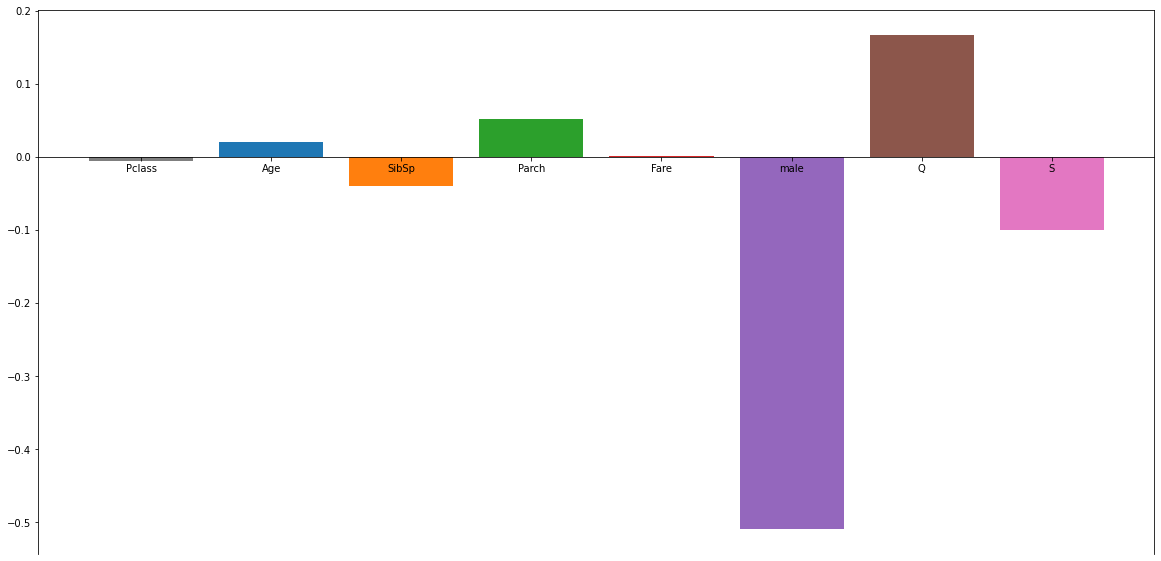

In [9]:
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(ridge_coefficient["Columns"],
ridge_coefficient['Coefficient Estimate'],color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [10]:
ridgeR.score(x_test_data, y_test_data)

0.1953477936951682

In [11]:
ridgeR.score(x_training_data, y_training_data)

0.42852976819452104